<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/R_Image_Processing_planet_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data
# #Training
# # #Labels
# # #Images
# #Validation
# # #Labels
# # #Images

In [1]:
install.packages(c('raster','sf','fasterize'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’




In [2]:
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpmJ2OIk/remotes10076b138ae1/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpmJ2OIk/file1007421fc27b/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [4]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
# library(gdalUtils)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift




In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c9a8f9a06833c874670bd7fd26e6f363&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQmpIeFhfWXBDNWtBZW51Qm1MWUxFU0xNQ2lQemdxcE9qamRRMFRfY3kzUERydnRmMlJxRVFCelZwXzBpelZCUSIsInN0YXRlIjoiYzlhOGY5YTA2ODMzYzg3NDY3MGJkN2ZkMjZlNmYzNjMifQ==


In [6]:
dir.create('input_data')

In [7]:
# https://drive.google.com/file/d/1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF/view?usp=drive_link
drive_download(file = as_id('1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF'), path =  '/content/input_data/NWI_wetlands.gpkg', overwrite = TRUE)
nwi_gpkg = st_read('/content/input_data/NWI_wetlands.gpkg')
nwi_gpkg

File downloaded:

• NWI_wetlands.gpkg <id: 1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF>

Saved locally as:

• /content/input_data/NWI_wetlands.gpkg



Reading layer `NWI_wetlands' from data source 
  `/content/input_data/NWI_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 13555 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -160.3031 ymin: 18.85975 xmax: -154.7531 ymax: 22.28533
Geodetic CRS:  WGS 84


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,PUBHh,0.2609826,Freshwater Pond,1056.1591,121.4864,MULTIPOLYGON (((-155.5763 1...
2,PUBHh,0.3178072,Freshwater Pond,1286.1200,129.4962,MULTIPOLYGON (((-155.5912 1...
3,PUS3Ah,0.2185504,Freshwater Pond,884.4421,107.8919,MULTIPOLYGON (((-155.6126 1...
4,PUS3Ah,0.4064771,Freshwater Pond,1644.9544,153.5977,MULTIPOLYGON (((-155.6217 1...
5,PUS3Ch,0.2855907,Freshwater Pond,1155.7447,124.3542,MULTIPOLYGON (((-155.6106 1...
6,PUS3Ch,0.4222651,Freshwater Pond,1708.8463,156.8640,MULTIPOLYGON (((-155.5966 1...
7,PUS3Ch,0.1888957,Freshwater Pond,764.4338,99.7818,MULTIPOLYGON (((-155.6122 1...
8,PUS3Ch,0.2335592,Freshwater Pond,945.1806,111.1221,MULTIPOLYGON (((-155.6162 1...
9,PUS3Ch,0.2310241,Freshwater Pond,934.9212,111.1674,MULTIPOLYGON (((-155.5946 1...


In [80]:
# # all 20 wetland areas in utm 4
# # https://drive.google.com/file/d/1k4xuc7puo9ayzlFxFrWMIiTv4Zu7gcb3/view?usp=drive_link

# drive_download(file = as_id('1k4xuc7puo9ayzlFxFrWMIiTv4Zu7gcb3'), path =  '/content/input_data/wetlands.gpkg', overwrite = TRUE)
# wetlands_gpkg  = st_read('/content/input_data/wetlands.gpkg')
# wetlands_gpkg

# utm5 wetlands - hawaii island
# https://drive.google.com/file/d/1fj2ebpkGNNpIPBRyi2hOyeNWlVlzUD7L/view?usp=drive_link
drive_download(file = as_id('1fj2ebpkGNNpIPBRyi2hOyeNWlVlzUD7L'), path =  '/content/input_data/wetlands_hawaii.gpkg', overwrite = TRUE)
wetlands_hawaii_gpkg  = st_read('/content/input_data/wetlands_hawaii.gpkg')
wetlands_hawaii_gpkg


Auto-refreshing stale OAuth token.

File downloaded:

• utm5_wetlands.gpkg <id: 1fj2ebpkGNNpIPBRyi2hOyeNWlVlzUD7L>

Saved locally as:

• /content/input_data/wetlands_hawaii.gpkg



Reading layer `utm5_wetlands' from data source 
  `/content/input_data/wetlands_hawaii.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 213311.3 ymin: 2182234 xmax: 288178.3 ymax: 2236783
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,island,name,lumahai,layer,path,geom
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,MULTIPOLYGON (((285757 2182...
1,hawaii,pololu,NA,pololu,E:/Data/AOI_Shapefiles/hawaii/pololu.shp,MULTIPOLYGON (((213311.3 22...
1,hawaii,waimanu,NA,waimanu,E:/Data/AOI_Shapefiles/hawaii/waimanu.shp,MULTIPOLYGON (((223006.9 22...
1,hawaii,waipio,NA,waipio,E:/Data/AOI_Shapefiles/hawaii/waipio.shp,MULTIPOLYGON (((226466.1 22...


In [9]:
# https://drive.google.com/file/d/1foSde5txo6hPvWp4kcQF8We2WTDqDpYh/view?usp=drive_link
drive_download(file = as_id('1foSde5txo6hPvWp4kcQF8We2WTDqDpYh'), path =  '/content/input_data/nlcd_hi_2001.tif', overwrite = TRUE)
nlcd_tif <- raster('/content/input_data/nlcd_hi_2001.tif')
nlcd_tif

File downloaded:

• nlcd_hi_2001.tif <id: 1foSde5txo6hPvWp4kcQF8We2WTDqDpYh>

Saved locally as:

• /content/input_data/nlcd_hi_2001.tif



class      : RasterLayer 
dimensions : 12618, 19439, 245281302  (nrow, ncol, ncell)
resolution : 30, 30  (x, y)
extent     : -345945, 237225, 1753875, 2132415  (xmin, xmax, ymin, ymax)
crs        : +proj=aea +lat_0=3 +lon_0=-157 +lat_1=8 +lat_2=18 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : nlcd_hi_2001.tif 
names      : nlcd_hi_2001 


In [ ]:
dir.create('extracted_data')

In [14]:
nwi_gpkg %>% st_crs

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizontal

In [81]:
wetlands_hawaii_gpkg %>% st_crs

Coordinate Reference System:
  User input: WGS 84 / UTM zone 5N 
  wkt:
PROJCRS["WGS 84 / UTM zone 5N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 5N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

In [15]:
wetlands_gpkg %>% st_crs

Coordinate Reference System:
  User input: WGS 84 / UTM zone 4N 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

In [17]:
# Convert coordinate systems to WGS84 UTM Zone 4N (EPSG:32604)
Nwi_wgs84_utm <- st_transform(nwi_gpkg, crs = 32604)
# Convert coordinate systems to WGS84 UTM Zone 4N (EPSG:32604)
Wetlands_wgs84_utm <- st_transform(wetlands_gpkg, crs = 32604)

In [31]:
Wetlands_wgs84_utm %>% st_crs

Coordinate Reference System:
  User input: EPSG:32604 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",

In [30]:
Nwi_wgs84_utm %>% st_crs

Coordinate Reference System:
  User input: EPSG:32604 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",

In [84]:
# Convert coordinate systems to WGS84 UTM Zone 4N (EPSG:32604)
Nwi_wgs84_utm_hawaii <- st_transform(Nwi_wgs84_utm, crs = 32605)


In [87]:
Nwi_wgs84_utm_hawaii

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,geom
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,1,PUBHh,0.2609826,Freshwater Pond,1056.1591,121.4864,MULTIPOLYGON (((230022.7 21...
2,2,PUBHh,0.3178072,Freshwater Pond,1286.1200,129.4962,MULTIPOLYGON (((228629.6 21...
3,3,PUS3Ah,0.2185504,Freshwater Pond,884.4421,107.8919,MULTIPOLYGON (((226387.3 21...
4,4,PUS3Ah,0.4064771,Freshwater Pond,1644.9544,153.5977,MULTIPOLYGON (((225440.1 21...
5,5,PUS3Ch,0.2855907,Freshwater Pond,1155.7447,124.3542,MULTIPOLYGON (((226575.2 21...
6,6,PUS3Ch,0.4222651,Freshwater Pond,1708.8463,156.8640,MULTIPOLYGON (((228047.3 21...
7,7,PUS3Ch,0.1888957,Freshwater Pond,764.4338,99.7818,MULTIPOLYGON (((226417.9 21...
8,8,PUS3Ch,0.2335592,Freshwater Pond,945.1806,111.1221,MULTIPOLYGON (((225989.5 21...
9,9,PUS3Ch,0.2310241,Freshwater Pond,934.9212,111.1674,MULTIPOLYGON (((228259.3 21...


In [85]:
# # Perform the intersection
# Nwi_Wetlands_intersection <- st_intersection(Nwi_wgs84_utm, Wetlands_wgs84_utm)
# Nwi_Wetlands_intersection

# Perform the intersection
Nwi_Wetlands_hawaii_intersection <- st_intersection(Nwi_wgs84_utm_hawaii, wetlands_hawaii_gpkg)
Nwi_Wetlands_hawaii_intersection

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,id,island,name,lumahai,layer,path,geom
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<GEOMETRY [m]>
1476,1476,E2EM1P,2.223429e+00,Estuarine and Marine Wetland,8.997910e+03,6.165511e+02,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287935.4 2183281,..."
1486,1486,PEM1C,8.576404e-01,Freshwater Emergent Wetland,3.470747e+03,2.575088e+02,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287439.4 2183078,..."
1487,1487,PEM1C,8.191074e-01,Freshwater Emergent Wetland,3.314810e+03,2.731235e+02,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287238.8 2183120,..."
1488,1488,PEM1C,2.951591e+01,Freshwater Emergent Wetland,1.194466e+05,3.962517e+03,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286991.2 2183244,..."
1489,1489,PEM1C,6.153188e+00,Freshwater Emergent Wetland,2.490107e+04,7.193329e+02,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286173.4 2183734,..."
1497,1497,PUBH,1.625567e+01,Freshwater Pond,6.578435e+04,1.661457e+03,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287430.7 2183114,..."
1498,1498,PUBH,2.857531e+00,Freshwater Pond,1.156402e+04,7.606649e+02,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287097 2183266, 2..."
1520,1520,R4SBC,2.228202e-02,Riverine,9.017212e+01,4.078514e+01,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286167.4 2183734,..."
5944,5944,M2RS1N,3.529882e+01,Estuarine and Marine Wetland,1.428321e+05,3.557589e+04,1,hawaii,lokoaka kionakapahu,NA,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286224.4 2183896,..."


In [ ]:
print(st_crs(Nwi_wgs84_utm))
print(st_crs(wetlands_hawaii_gpkg))

In [86]:
# Nwi_Wetlands_intersection %>% st_write("/content/extracted_data/Nwi_Wetlands_intersection.gpkg", driver = "GPKG")
Nwi_Wetlands_hawaii_intersection %>% st_write("/content/extracted_data/Nwi_Wetlands_hawaii_intersection.gpkg", driver = "GPKG")

Writing layer `Nwi_Wetlands_hawaii_intersection' to data source 
  `/content/extracted_data/Nwi_Wetlands_hawaii_intersection.gpkg' using driver `GPKG'
Writing 100 features with 12 fields and geometry type Unknown (any).


In [32]:
Nwi_Wetlands_intersection %>% st_crs

Coordinate Reference System:
  User input: EPSG:32604 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",

In [10]:
dir.create('/content/input_data/Planet')

In [11]:
# https://drive.google.com/drive/folders/1NTUD7LeNMx7nqzjgANqsiDT06TkfrFUz?usp=drive_link
      # Drive/DeepLearning_Project/Datasets/planet folder

jp_folder = "1NTUD7LeNMx7nqzjgANqsiDT06TkfrFUz"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/input_data/Planet/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name   id                                drive_resource   
  <chr>  <drv_id>                          <list>           
1 planet 1NTUD7LeNMx7nqzjgANqsiDT06TkfrFUz <named list [34]>


File downloaded:

• anahola_2018-12-05.tif <id: 1-GsHLUxjlL8Vs4sWbWNlTtsJNZd_lPsn>

Saved locally as:

• /content/input_data/Planet/anahola_2018-12-05.tif

File downloaded:

• anahola_2018-08-19.tif <id: 103HHEDYnAspp4cvd6ZYCJ_aofxbmsdIC>

Saved locally as:

• /content/input_data/Planet/anahola_2018-08-19.tif

File downloaded:

• anahola_2018-02-20.tif <id: 1-QLeRj3dvjZMhyT79m2dCoCTMTu-C16C>

Saved locally as:

• /content/input_data/Planet/anahola_2018-02-20.tif

File downloaded:

• anahola_2018-01-12.tif <id: 1-98odkC2H8X3TocnwuagXvLY9Ps1IFla>

Saved locally as:

• /content/input_data/Planet/anahola_2018-01-12.tif

File downloaded:

• waipio_2020-10-18.tif <id: 1ZVJ1rMyIgdULASlHf20tXRX956CQ2SgU>

Saved locally as:

• /content/input_data/Planet/waipio_2020-10-18.tif

File downloaded:

• waipio_2020-03-02.tif <id: 1YP-gt1KSxq1gYtoSEzUQmw9GhFcD4-iL>

Saved locally as:

• /content/input_data/Planet/waipio_2020-03-02.tif

File downloaded:

• waipio_2020-05-27.tif <id: 1XrxefyV3xjXY781Ma23v

In [52]:
planet_gpkg <-
"/content/input_data/Planet" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [53]:
planet_gpkg

geometry,path
<POLYGON [m]>,<chr>
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2018-01-12.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2018-02-20.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2018-08-19.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2018-12-05.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2019-01-07.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2019-02-05.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2019-04-19.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2019-05-26.tif
"POLYGON ((467439 2447514, 4...",/content/input_data/Planet/anahola_2019-06-08.tif


In [56]:
planet_gpkg %>% st_write("/content/extracted_data/planet.gpkg", driver = "GPKG")

Writing layer `planet' to data source 
  `/content/extracted_data/planet.gpkg' using driver `GPKG'
Writing 299 features with 1 fields and geometry type Polygon.


In [ ]:
planet_gpkg

In [40]:
dir.create('/content/input_data/planet_hawaii')

In [51]:
# # Define source and destination folders
# source_folder <- "/content/input_data/Planet/"
# destination_folder <- "/content/input_data/planet_hawaii/"

# # List of file names to move
# files_to_move <- c("lokoaka_kionakapahu_2019-01-24.tif", "lokoaka_kionakapahu_2019-08-07.tif", "lokoaka_kionakapahu_2019-10-30.tif", "lokoaka_kionakapahu_2019-12-07.tif",
# "lokoaka_kionakapahu_2020-02-04.tif", 'lokoaka_kionakapahu_2020-04-19.tif', "lokoaka_kionakapahu_2020-06-03.tif", "lokoaka_kionakapahu_2020-09-14.tif")

# # Iterate over each file name
# for (file_name in files_to_move) {
#   # Construct file paths
#   source_file <- file.path(source_folder, file_name)
#   destination_file <- file.path(destination_folder, file_name)

#   # Check if the file exists in the source folder
#   if (file.exists(source_file)) {
#     # Move the file to the destination folder
#     file.copy(source_file, destination_file, overwrite = TRUE)
#     print(paste("Moved file:", file_name))

#     # Remove the file from the source folder
#     file.remove(source_file)
#     print(paste("Removed file from source folder:", file_name))
#   } else {
#     print(paste("File not found:", file_name))
#   }
# }



# Define source and destination folders
source_folder <- "/content/input_data/Planet/"
destination_folder <- "/content/input_data/planet_hawaii/"

# Get a list of all files in the source folder that include the name "lokoaka_kionakapahu_"
files_to_move <- list.files(source_folder, pattern = "waipio_", full.names = TRUE)

# Iterate over each file to move
for (source_file in files_to_move) {
  # Extract the file name
  file_name <- basename(source_file)

  # Construct the destination file path
  destination_file <- file.path(destination_folder, file_name)

  # Move the file to the destination folder
  file.copy(source_file, destination_file, overwrite = TRUE)
  print(paste("Moved file:", file_name))

  # Remove the file from the source folder
  file.remove(source_file)
  print(paste("Removed file from source folder:", file_name))
}

[1] "Moved file: waipio_2018-01-09.tif"
[1] "Removed file from source folder: waipio_2018-01-09.tif"
[1] "Moved file: waipio_2018-02-06.tif"
[1] "Removed file from source folder: waipio_2018-02-06.tif"
[1] "Moved file: waipio_2018-09-19.tif"
[1] "Removed file from source folder: waipio_2018-09-19.tif"
[1] "Moved file: waipio_2018-10-01.tif"
[1] "Removed file from source folder: waipio_2018-10-01.tif"
[1] "Moved file: waipio_2018-12-11.tif"
[1] "Removed file from source folder: waipio_2018-12-11.tif"
[1] "Moved file: waipio_2019-02-18.tif"
[1] "Removed file from source folder: waipio_2019-02-18.tif"
[1] "Moved file: waipio_2019-03-31.tif"
[1] "Removed file from source folder: waipio_2019-03-31.tif"
[1] "Moved file: waipio_2019-06-23.tif"
[1] "Removed file from source folder: waipio_2019-06-23.tif"
[1] "Moved file: waipio_2019-10-20.tif"
[1] "Removed file from source folder: waipio_2019-10-20.tif"
[1] "Moved file: waipio_2019-12-09.tif"
[1] "Removed file from source folder: waipio_2019-1

In [27]:
dir.create('/content/input_data/HI_DEM')

In [28]:
#folder link to id
jp_folder = "15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB"
folder_id = drive_get(as_id(jp_folder))
print(folder_id)
#find files in folder
files = drive_ls(folder_id)

#loop dirs and download files inside them
for (i in seq_along(files$name)) {

  i_dir <- files[i, ]
    try({
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/input_data/HI_DEM/', i_dir$name[1])
      )
    })
  }


# A dribble: 1 × 3
  name  id                                drive_resource   
  <chr> <drv_id>                          <list>           
1 dem   15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB <named list [34]>


File downloaded:

• maui_10m.tif <id: 10dHshukbiMC3z7h4xWxeOdY7x6dtkOf2>

Saved locally as:

• /content/input_data/HI_DEM/maui_10m.tif

File downloaded:

• kauai_10m.tif <id: 17G_F8uiM6c-0qe24JPCGUZWMAp2uoIro>

Saved locally as:

• /content/input_data/HI_DEM/kauai_10m.tif

File downloaded:

• hawaii_10m.tif <id: 1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft>

Saved locally as:

• /content/input_data/HI_DEM/hawaii_10m.tif

File downloaded:

• oahu_10m.tif <id: 19_F1B-d5trv8iwBDBNKcLCWa19vnFvGI>

Saved locally as:

• /content/input_data/HI_DEM/oahu_10m.tif

File downloaded:

• molokai_10m.tif <id: 14WqA4pNafauzjr2tlJUUJjYROsaH7uEX>

Saved locally as:

• /content/input_data/HI_DEM/molokai_10m.tif



In [33]:
dem_gpkg <-
"/content/input_data/HI_DEM" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [36]:
dem_gpkg

geometry,path
<POLYGON [°]>,<chr>
POLYGON ((-156.1156 18.8597...,/content/input_data/HI_DEM/hawaii_10m.tif
POLYGON ((-159.8432 21.8181...,/content/input_data/HI_DEM/kauai_10m.tif
POLYGON ((-156.7506 20.5252...,/content/input_data/HI_DEM/maui_10m.tif
POLYGON ((-157.3647 20.9877...,/content/input_data/HI_DEM/molokai_10m.tif
POLYGON ((-158.336 21.20128...,/content/input_data/HI_DEM/oahu_10m.tif


In [58]:
dem_gpkg %>% st_write("/content/extracted_data/dem_gpkg.gpkg", driver = "GPKG")

Writing layer `dem_gpkg' to data source 
  `/content/extracted_data/dem_gpkg.gpkg' using driver `GPKG'
Writing 5 features with 1 fields and geometry type Polygon.


In [60]:
# library(raster)

# Define the source folder
source_folder <- "/content/input_data/planet_hawaii/"

# Get a list of all files in the source folder that match the pattern
file_names <- list.files(source_folder, full.names = TRUE)

# Create an empty list to store the stacks
stacks <- list()

# Iterate over each unique file name pattern
unique_names <- unique(gsub("^.*?([^/]+)_.*$", "\\1", file_names))
for (name in unique_names) {
  # Get all files with the same name pattern
  files <- file_names[grep(paste0("^.*?", name, "_.*$"), file_names)]

  # Stack the files together
  stack_obj <- stack(files)

  # Add the stack to the list
  stacks[[name]] <- stack_obj
}

# Access the stacked raster stacks
# For example, to access the stack for 'anahola'
# anahola_stack <- stacks[["anahola"]]


In [159]:
library(raster)

# Define the source folder
source_folder <- "/content/input_data/Planet/"

# Get a list of all files in the source folder that match the pattern
file_names <- list.files(source_folder, full.names = TRUE)

# Create an empty list to store the stacks
stacks <- list()

# Iterate over each unique file name pattern
unique_names <- unique(gsub("^.*?([^/]+)_.*$", "\\1", file_names))
for (name in unique_names) {
  # Get all files with the same name pattern
  files <- file_names[grep(paste0("^.*?", name, "_.*$"), file_names)]

  # Create an empty list to store the raster objects
  rasters <- list()

  # Check the extent of each raster file
  for (file in files) {
    raster_obj <- raster(file)
    rasters[[file]] <- raster_obj

    # Check if the extent matches the first raster file's extent
    if (length(rasters) > 1) {
      if (!compareRaster(rasters)) {
        stop("Different extent: ", file)
      }
    }
  }

  # Stack the raster files together
  stack_obj <- stack(rasters)

  # Add the stack to the list
  stacks[[name]] <- stack_obj
}


ERROR: Error in compareRaster(rasters): different extent


In [74]:
lokoaka_kionakapahu_stack <- stacks[["lokoaka_kionakapahu"]]
lokoaka_kionakapahu_stack

class      : RasterStack 
dimensions : 582, 808, 470256, 76  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 285756, 288180, 2182233, 2183979  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : lokoaka_k//.01.29_1.1, lokoaka_k//.01.29_1.2, lokoaka_k//.01.29_1.3, lokoaka_k//.01.29_1.4, lokoaka_k//.02.11_1.1, lokoaka_k//.02.11_1.2, lokoaka_k//.02.11_1.3, lokoaka_k//.02.11_1.4, lokoaka_k//.06.30_1.1, lokoaka_k//.06.30_1.2, lokoaka_k//.06.30_1.3, lokoaka_k//.06.30_1.4, lokoaka_k//.07.05_1.1, lokoaka_k//.07.05_1.2, lokoaka_k//.07.05_1.3, ... 


In [73]:
pololu_stack <- stacks[["pololu"]]
pololu_stack

class      : RasterStack 
dimensions : 1131, 584, 660504, 88  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 213309, 215061, 2233392, 2236785  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : pololu_2018.01.10_1.1, pololu_2018.01.10_1.2, pololu_2018.01.10_1.3, pololu_2018.01.10_1.4, pololu_2018.06.22_1.1, pololu_2018.06.22_1.2, pololu_2018.06.22_1.3, pololu_2018.06.22_1.4, pololu_2018.08.31_1.1, pololu_2018.08.31_1.2, pololu_2018.08.31_1.3, pololu_2018.08.31_1.4, pololu_2018.09.19_1.1, pololu_2018.09.19_1.2, pololu_2018.09.19_1.3, ... 


In [140]:
waipio_stack <- stacks[["waipio"]]
waipio_stack

class      : RasterStack 
dimensions : 1555, 1000, 1555000, 60  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 226464, 229464, 2223090, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : waipio_2018.01.09_1.1, waipio_2018.01.09_1.2, waipio_2018.01.09_1.3, waipio_2018.01.09_1.4, waipio_2018.02.06_1.1, waipio_2018.02.06_1.2, waipio_2018.02.06_1.3, waipio_2018.02.06_1.4, waipio_2018.09.19_1.1, waipio_2018.09.19_1.2, waipio_2018.09.19_1.3, waipio_2018.09.19_1.4, waipio_2018.10.01_1.1, waipio_2018.10.01_1.2, waipio_2018.10.01_1.3, ... 


class      : RasterStack 
dimensions : 1049, 592, 621008, 56  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 223005, 224781, 2227116, 2230263  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : waimanu_2018.03.15_1.1, waimanu_2018.03.15_1.2, waimanu_2018.03.15_1.3, waimanu_2018.03.15_1.4, waimanu_2018.07.20_1.1, waimanu_2018.07.20_1.2, waimanu_2018.07.20_1.3, waimanu_2018.07.20_1.4, waimanu_2018.09.19_1.1, waimanu_2018.09.19_1.2, waimanu_2018.09.19_1.3, waimanu_2018.09.19_1.4, waimanu_2018.10.01_1.1, waimanu_2018.10.01_1.2, waimanu_2018.10.01_1.3, ... 


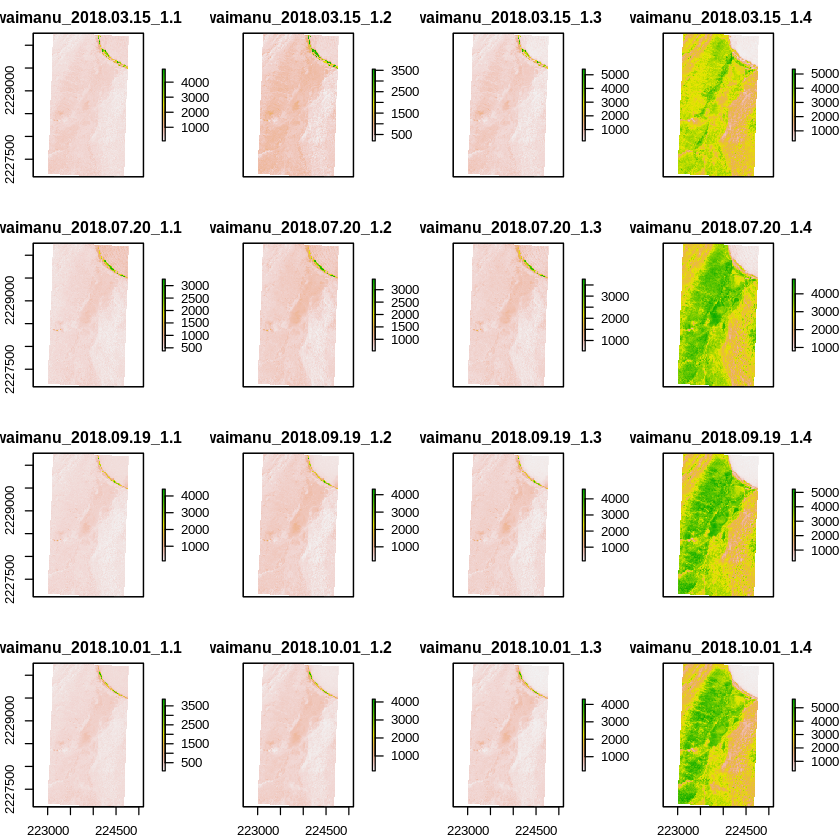

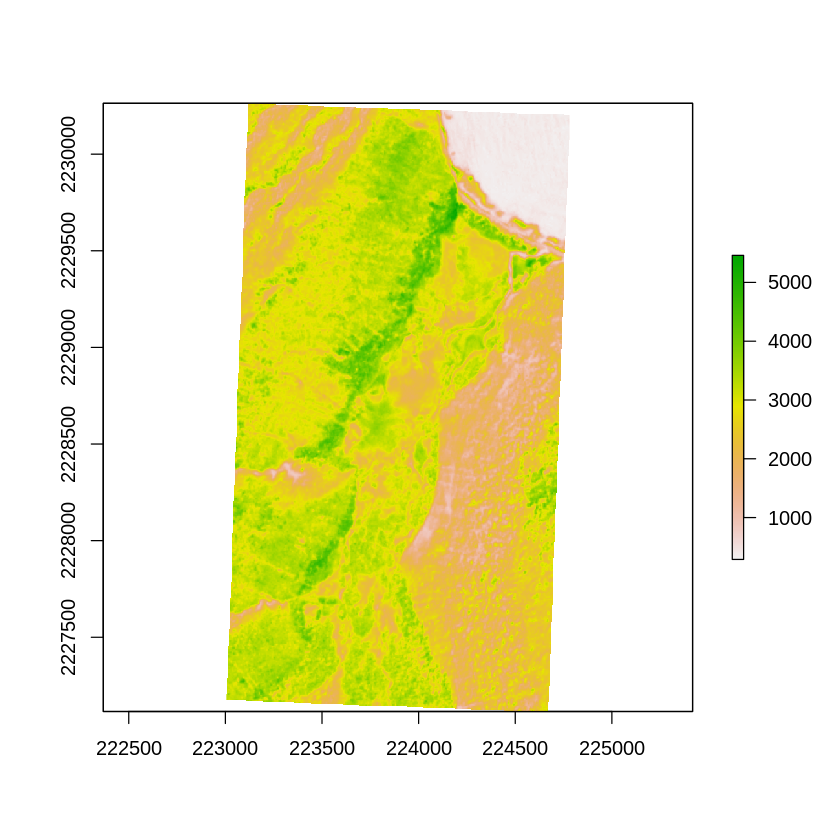

In [76]:
waimanu_stack <- stacks[["waimanu"]]
waimanu_stack
waimanu_stack %>% plot
waimanu_stack [[4]] %>% plot

In [ ]:
wetland_pololu_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(pololu_stack,.)
wetland_pololu_stack
# wetland_pololu_stack %>% plot
fishent_128_wetland_pololu_stack <- wetland_pololu_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_wetland_pololu_stack %>% plot
# fishent_128_wetland_pololu_stack %>% st_write("/content/extracted_data/fishent_128_wetland_pololu_stack.gpkg", driver = "GPKG")

In [ ]:
wetland_lokoaka_kionakapahu_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(lokoaka_kionakapahu_stack,.)
wetland_lokoaka_kionakapahu_stack
# wetland_lokoaka_kionakapahu_stack %>% plot
fishent_128_wetland_lokoaka_kionakapahu_stack <- wetland_lokoaka_kionakapahu_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_128_wetland_lokoaka_kionakapahu_stack %>% plot
# fishent_128_wetland_lokoaka_kionakapahu_stack %>% st_write("/content/extracted_data/fishent_128_wetland_lokoaka_kionakapahu_stack.gpkg", driver = "GPKG")

In [ ]:
wetland_waipio_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(waipio_stack,.)
wetland_waipio_stack
# wetland_lokoaka_kionakapahu_stack %>% plot
fishent_128_wetland_waipio_stack <- wetland_waipio_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_128_wetland_waipio_stack %>% plot
# fishent_128_wetland_waipio_stack %>% st_write("/content/extracted_data/fishent_128_wetland_waipio_stack.gpkg", driver = "GPKG")

In [ ]:
wetland_waimanu_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(waimanu_stack,.)
wetland_waimanu_stack
# wetland_waimanu_stack %>% plot
fishent_128_wetland_waimanu_stack <- wetland_waimanu_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_128_wetland_waimanu_stack %>% plot
# fishent_128_wetland_waimanu_stack %>% st_write("/content/extracted_data/fishent_128_wetland_waimanu_stack.gpkg", driver = "GPKG")

In [156]:
wetland_lokoaka_kionakapahu_stack

class      : RasterBrick 
dimensions : 430, 807, 347010, 76  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 285756, 288177, 2182689, 2183979  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : lokoaka_k//.01.29_1.1, lokoaka_k//.01.29_1.2, lokoaka_k//.01.29_1.3, lokoaka_k//.01.29_1.4, lokoaka_k//.02.11_1.1, lokoaka_k//.02.11_1.2, lokoaka_k//.02.11_1.3, lokoaka_k//.02.11_1.4, lokoaka_k//.06.30_1.1, lokoaka_k//.06.30_1.2, lokoaka_k//.06.30_1.3, lokoaka_k//.06.30_1.4, lokoaka_k//.07.05_1.1, lokoaka_k//.07.05_1.2, lokoaka_k//.07.05_1.3, ... 
min values :                     9,                   206,                   159,                   292,                   171,                   257,                   162,                   316,                    22,                   185,                   118,                   163,                   244,                   364,                   296, ... 
max

In [77]:
wetland_sample <- Wetlands_wgs84_utm[1,]

In [ ]:
Wetlands_wgs84_utm

In [93]:
wetland_sample <- wetlands_hawaii_gpkg[2,]

In [ ]:
wetland_sample

In [105]:
wetland_example <- wetlands_hawaii_gpkg %>% crop(pololu_stack,.)

In [106]:
wetland_example

class      : RasterBrick 
dimensions : 1130, 583, 658790, 88  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 213312, 215061, 2233392, 2236782  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : pololu_2018.01.10_1.1, pololu_2018.01.10_1.2, pololu_2018.01.10_1.3, pololu_2018.01.10_1.4, pololu_2018.06.22_1.1, pololu_2018.06.22_1.2, pololu_2018.06.22_1.3, pololu_2018.06.22_1.4, pololu_2018.08.31_1.1, pololu_2018.08.31_1.2, pololu_2018.08.31_1.3, pololu_2018.08.31_1.4, pololu_2018.09.19_1.1, pololu_2018.09.19_1.2, pololu_2018.09.19_1.3, ... 
min values :                     1,                    67,                    75,                   106,                   196,                   292,                   248,                   638,                   100,                   219,                   223,                   433,                   184,                   250,                   216, ... 
ma

In [ ]:
wetland_example_2
wetland_example_2 %>% plot

In [ ]:
wetlands_hawaii_gpkg
wetlands_hawaii_gpkg %>% plot

In [ ]:
# Nwi_Wetlands_hawaii_intersection
Nwi_Wetlands_hawaii_intersection %>% plot

In [ ]:
wetland_example %>% plot

# **OTHER**

In [ ]:
# https://drive.google.com/file/d/1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS/view?usp=drive_link
drive_download(file = as_id('1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS'), path =  '/content/input_data/naip_index.zip', overwrite = FALSE)

File downloaded:

• tileindex_HI_NAIP_2021.zip <id: 1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS>

Saved locally as:

• /content/input_data/naip_index.zip



In [ ]:
unzip(zipfile ='/content/input_data/naip_index.zip', exdir = "/content/input_data/naip_index/")

In [ ]:
# https://drive.google.com/file/d/1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF/view?usp=drive_link
drive_download(file = as_id('1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF'), path =  '/content/input_data/NWI_wetlands.gpkg', overwrite = TRUE)

File downloaded:

• NWI_wetlands.gpkg <id: 1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF>

Saved locally as:

• /content/input_data/NWI_wetlands.gpkg



In [ ]:
# https://drive.google.com/file/d/1cKHJ95tAkl0CSoNZkdO0w2wlaH6Wr_YZ/view?usp=drive_link
drive_download(file = as_id('1cKHJ95tAkl0CSoNZkdO0w2wlaH6Wr_YZ'), path =  '/content/input_data/wetlands.gpgk', overwrite = TRUE)

File downloaded:

• wetland_AOI.gpkg <id: 1cKHJ95tAkl0CSoNZkdO0w2wlaH6Wr_YZ>

Saved locally as:

• /content/input_data/wetlands.gpkg



In [ ]:
# https://drive.google.com/file/d/1foSde5txo6hPvWp4kcQF8We2WTDqDpYh/view?usp=drive_link
drive_download(file = as_id('1foSde5txo6hPvWp4kcQF8We2WTDqDpYh'), path =  '/content/input_data/nlcd_hi_2001', overwrite = TRUE)

Auto-refreshing stale OAuth token.

File downloaded:

• nlcd_hi_2001.tif <id: 1foSde5txo6hPvWp4kcQF8We2WTDqDpYh>

Saved locally as:

• /content/input_data/nlcd_hi_2001



In [ ]:
nlcd_tif <- raster('/content/input_data/nlcd_hi_2001')

In [ ]:
nwi_gpkg = st_read('/content/input_data/NWI_wetlands.gpkg')

Reading layer `NWI_wetlands' from data source 
  `/content/input_data/NWI_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 13555 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -160.3031 ymin: 18.85975 xmax: -154.7531 ymax: 22.28533
Geodetic CRS:  WGS 84


In [ ]:
naip_index_gpkg = st_read('/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp')

Reading layer `tileindex_HI_NAIP_2021' from data source 
  `/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 611 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -160.3144 ymin: 18.8732 xmax: -154.7481 ymax: 22.25184
Geodetic CRS:  NAD83


In [ ]:
wetlands_gpkg = st_read('/content/input_data/wetlands.gpgk')

Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“GDAL Message 1: File /content/input_data/wetlands.gpgk has GPKG application_id, but non conformant file extension”


Reading layer `wetland_AOI' from data source `/content/input_data/wetlands.gpgk' using driver `GPKG'
Simple feature collection with 17 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 444046 ymin: 2185865 xmax: 917131.2 ymax: 2457336
Projected CRS: WGS 84 / UTM zone 4N


In [ ]:
# wetlands_gpkg %>% plot

In [ ]:
download_index_gpkg <- naip_index_gpkg %>% st_intersection(wetlands_gpkg %>% st_transform(st_crs(naip_index_gpkg)))

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [ ]:
download_index_gpkg$url %>% unique %>% length

[1] 48

In [ ]:
dir.create('HI_2021_NAIP')

In [ ]:
# dem_gpkg %>% st_as_sf %>% st_crs

In [ ]:
cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,download_index_gpkg){
  x_dt <- download_index_gpkg[x,]
  download.file(x_dt$url, paste('/content/HI_2021_NAIP/',x_dt$location,sep='') )
  },download_index_gpkg)
stopCluster(cl)

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

[[11]]
[1] 0

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0

[[16]]
[1] 0

[[17]]
[1] 0

[[18]]
[1] 0

[[19]]
[1] 0

[[20]]
[1] 0

[[21]]
[1] 0

[[22]]
[1] 0

[[23]]
[1] 0

[[24]]
[1] 0

[[25]]
[1] 0

[[26]]
[1] 0

[[27]]
[1] 0

[[28]]
[1] 0

[[29]]
[1] 0

[[30]]
[1] 0

[[31]]
[1] 0

[[32]]
[1] 0

[[33]]
[1] 0

[[34]]
[1] 0

[[35]]
[1] 0

[[36]]
[1] 0

[[37]]
[1] 0

[[38]]
[1] 0

[[39]]
[1] 0

[[40]]
[1] 0

[[41]]
[1] 0

[[42]]
[1] 0

[[43]]
[1] 0

[[44]]
[1] 0

[[45]]
[1] 0

[[46]]
[1] 0

[[47]]
[1] 0

[[48]]
[1] 0

[[49]]
[1] 0

[[50]]
[1] 0

[[51]]
[1] 0

[[52]]
[1] 0

[[53]]
[1] 0

[[54]]
[1] 0

[[55]]
[1] 0

In [ ]:
download.file('https://coast.noaa.gov/htdata/raster7/imagery/HI_NAIP_2021_9668/HI_NAIP_2021_EPSG-26904.vrt', paste('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt',sep=''))

In [ ]:
hawaii_naip <- stack('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt')

In [ ]:
dir.create('output_fishnets')

In [ ]:
1:nrow(wetlands_gpkg) %>%
  lapply(function(y){
wetlands_sample <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)
dem_loc_gpkg <- dem_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
dem_load_tif <- dem_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif)))
nlcd_load_tif <- nlcd_tif %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(nlcd_tif)))
wetlands_fishnnet_gpkg <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf
# file.remove(paste0('/content/output_fishnets/',wetlands_sample$layer[1],'.gpkg'))
st_write(wetlands_fishnnet_gpkg,paste0('/content/output_fishnets/',wetlands_gpkg$layer[y],'.gpkg'),delete_dsn=T,delete_layer = T)

cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,wetlands_fishnnet_gpkg,hawaii_naip,wetlands_sample,dem_load_tif,nlcd_load_tif,nwi_gpkg){

library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
sample_chip <- wetlands_fishnnet_gpkg[x,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(wetlands_sample,.)
sample_chip$dem <- projectRaster(dem_load_tif, sample_chip, method="ngb")
sample_chip$nlcd <- projectRaster(nlcd_load_tif, sample_chip, method="ngb")
nwi_gpkg$wetland_ty <- nwi_gpkg$wetland_ty %>% as.factor
nwi_gpkg <- nwi_gpkg %>% st_transform(st_crs(sample_chip))
sample_chip$class <- fasterize(
nwi_gpkg,
sample_chip[[1]],
field = 'wetland_ty',
fun = "first")
sample_chip$class_fill <-sample_chip$class
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- values(sample_chip$nlcd)[is.na(values(sample_chip$class_fill))]
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- 0
values(sample_chip$dem)[is.na(values(sample_chip$dem))] <- 0
values(sample_chip$nlcd)[is.na(values(sample_chip$nlcd))] <- 0
values(sample_chip$class)[is.na(values(sample_chip$class))] <- 0
sample_chip  %>% writeRaster(paste0('output_chips/',(sample_chip %>% extent %>% round)[1],'_',(sample_chip %>% extent %>% round)[3],'.tif'),overwrite=T)

  },wetlands_fishnnet_gpkg,hawaii_naip,wetlands_sample,dem_load_tif,nlcd_load_tif,nwi_gpkg)
stopCluster(cl)
  })

Deleting source `/content/output_fishnets/anahola.gpkg' using driver `GPKG'
Writing layer `anahola' to data source 
  `/content/output_fishnets/anahola.gpkg' using driver `GPKG'
Writing 1080 features with 0 fields and geometry type Polygon.


ERROR: Error in .local(x, y, ...): extents do not overlap


In [ ]:
zip(zipfile = 'testZip', files = 'testDir/test.csv') #make this work

In [ ]:
#put code here to upload to drive